In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('amazon/amazon.csv')
data.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
#Analysing the users and categories
#objective: whether the same user bought multiple products, and if so, analyze the categories of those products.

In [4]:
#User_id divide
#Whether same user bought different product?
#If they bought, which category they belong?

In [5]:
#First divide categories into two, one main category and sub category
#Explode the user_id
#check the products bought by the same user_id

In [6]:
data1=data[['product_id','product_name','category','user_id']]

In [7]:
data1 = data1.copy()
data1[['main_category','subcategory']]=data1['category'].str.split('|',n=1,expand=True)

In [8]:
data1['user_id']=data1['user_id'].str.split(',')
data1=data1.explode('user_id')

In [9]:
#Finding the number of unique products each user bought and segregating those who bought more than one product.
user_product_count=data1.groupby('user_id')['product_name'].nunique().reset_index()
multi_buyers = user_product_count[user_product_count['product_name'] > 1]
multi_buyers.sort_values(by='product_name',ascending=False)

,user_id,product_name
227,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,9
4776,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,9
7853,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,8
8131,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,8
3248,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,8
...,...,...
1941,AEVN7RMFICHOZR6CD2KNIV7LW4IQ,2
4913,AG7BFEWBPUBPVFTK47EIJDAYUBNQ,2
4905,AG76GICZHJGA7YVN4TORX36ONVYA,2
4900,AG73KSBFVJ5HI7YVT6EH5WTAY67Q,2


In [10]:
multi_users=data1['user_id'].value_counts().reset_index()
multi_users.columns=['user_id','count']
multi_users = multi_users[multi_users['count']> 1]

In [11]:
multi_user_data=data1[data1['user_id'].isin(multi_users['user_id'])]

In [12]:
#Finding the categories from which the user bought
user_categories = multi_user_data.groupby('user_id')['main_category'].unique().reset_index()
user_categories.columns = ['user_id', 'categories_used']

In [13]:
user_categories.head()

,user_id,categories_used
0,AE27UOZENYSWCQVQRRUQIV2ZM7VA,[Electronics]
1,AE2E632GMYL5U2ESNXOX5UT5D34A,[Computers&Accessories]
2,AE2EO67O5G5BPFX5QGUUBOF22LQQ,[Electronics]
3,AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,[Computers&Accessories]
4,AE2ODWBBOBD2SITDDIEJ644OSRFQ,[Electronics]


In [14]:
user_categories['categories_used'].value_counts()

categories_used
[Electronics]                            626
[Computers&Accessories]                  533
[Home&Kitchen]                            29
[OfficeProducts]                           2
[Electronics, Home&Kitchen]                1
                                        ... 
[Computers&Accessories, Home&Kitchen]      1
[Electronics, Computers&Accessories]       1
[Computers&Accessories, Electronics]       1
[Computers&Accessories, Home&Kitchen]      1
[Electronics, Computers&Accessories]       1
Name: count, Length: 118, dtype: int64

In [15]:
#Number of categories each user purchased from.
multi_user_df = data1[data1['user_id'].isin(multi_buyers['user_id'])]

category_per_user = multi_user_df.groupby('user_id')['main_category'].nunique().reset_index()
category_per_user.columns = ['user_id', 'unique_main_categories']

In [16]:
more_than_one_category=category_per_user[category_per_user['unique_main_categories']>1]
more_than_one_category=more_than_one_category.reset_index().sort_values(by='unique_main_categories',ascending=False)
more_than_one_category=more_than_one_category.head(10)

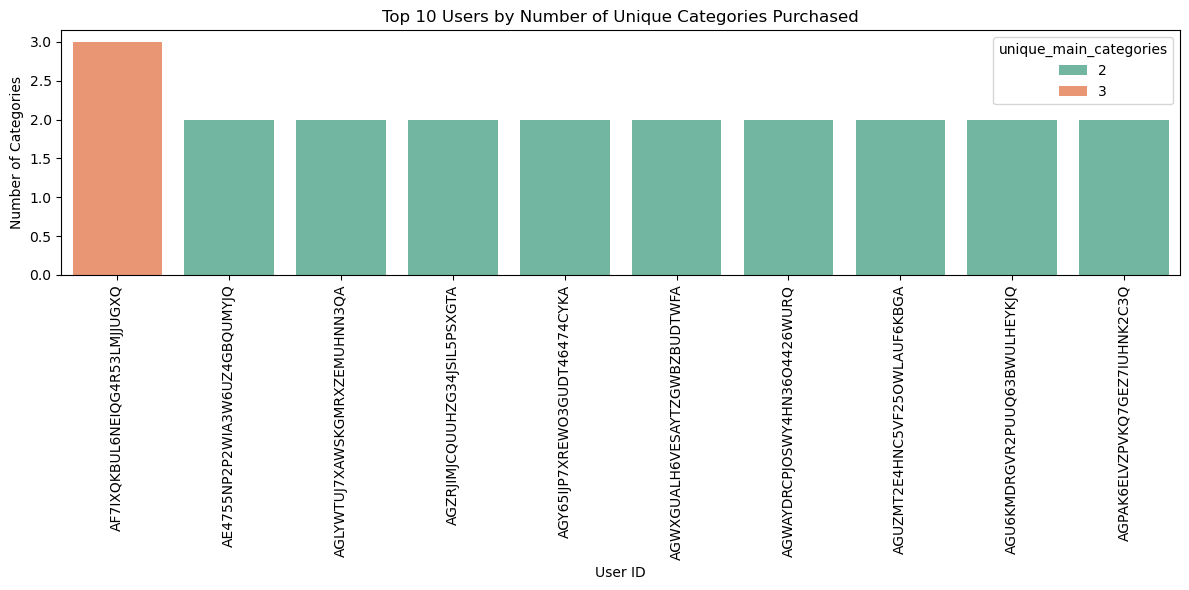

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='user_id', y='unique_main_categories',hue='unique_main_categories', data=more_than_one_category, palette='Set2')
plt.title('Top 10 Users by Number of Unique Categories Purchased')
plt.xlabel('User ID')
plt.ylabel('Number of Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
#Number of products each user bought
more_than_one_multi_users = multi_users[multi_users['count'] > 1].sort_index(ascending=True)
more_than_one_multi_users=more_than_one_multi_users.head(10)

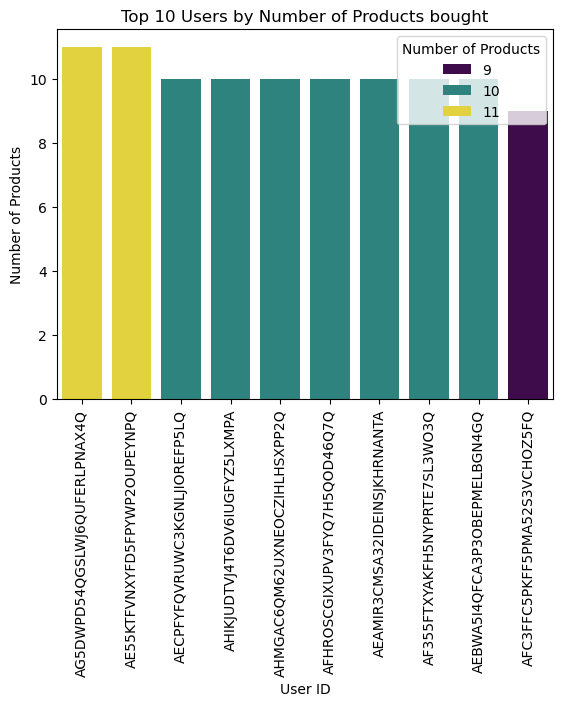

In [19]:
#Top 10 users 
sns.barplot(x='user_id',y='count',hue='count',data=more_than_one_multi_users, palette='viridis')
plt.xlabel('User ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.title('Top 10 Users by Number of Products bought')
plt.legend(title='Number of Products')
plt.show();

In [20]:
#Did any multiuser bought more than two same products?

In [21]:
# Count how many times each user purchased each product
data2=data1[data1['user_id'].isin(more_than_one_multi_users['user_id'])]
duplicate_product_counts = data1.groupby(['user_id', 'product_name']).size().reset_index(name='count')

# Filter only those where count > 1
same_product_multiple_times = duplicate_product_counts[duplicate_product_counts['count'] > 1]


In [22]:
same_product_multiple_times =same_product_multiple_times.sort_values(by='count', ascending=False).reset_index(drop=True)

In [23]:
same_product_multiple_times

,user_id,product_name,count
0,AHM4G7MHKTEAZ7KQ6ADSZOTL5BEA,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
1,AHRKSUOZXKKDERRY3VZBVMMWX37Q,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
2,AEC6UDCEAUIBIFHGQDQ4KR67GC4A,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
3,AHHYFEVKBVQB52YMNNKAZT6C75LA,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
4,AH4F4OZIOIIBXGLL6IZIJAXSTDXA,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
...,...,...,...
752,AFMQHAPYUAV7ZSPABOAVTNZVESWA,HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...,2
753,AFMZPE7XRDTD4DOUAAMZOME6HG7A,Noise ColorFit Pulse Grand Smart Watch with 1....,2
754,AFNAPG6Q3WJAMY4MYDEV2W7JSPLQ,KINGONE Wireless Charging Pencil (2nd Generati...,2
755,AFNFUGSKHFEN7D2XJICFYQIK62VQ,Ambrane 20000mAh Power Bank with 20W Fast Char...,2


In [24]:
#Same Products which are bought more than two times.
same_product_multiple_times[same_product_multiple_times['count']>3]['product_name'].unique()

array(['Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution',
       'Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating'],
      dtype=object)

In [25]:
# Heatmap: User vs. Category
#To show how many products each user has in each category (dense matrix if many users/categories).

In [26]:
user_category_matrix = data1.pivot_table(index='user_id', columns='main_category', aggfunc='size', fill_value=0)
# Filtering top 10 users with most categories
top_users = more_than_one_category.sort_values(by='unique_main_categories', ascending=False).head(10)['user_id']
filtered_matrix = user_category_matrix.loc[top_users]

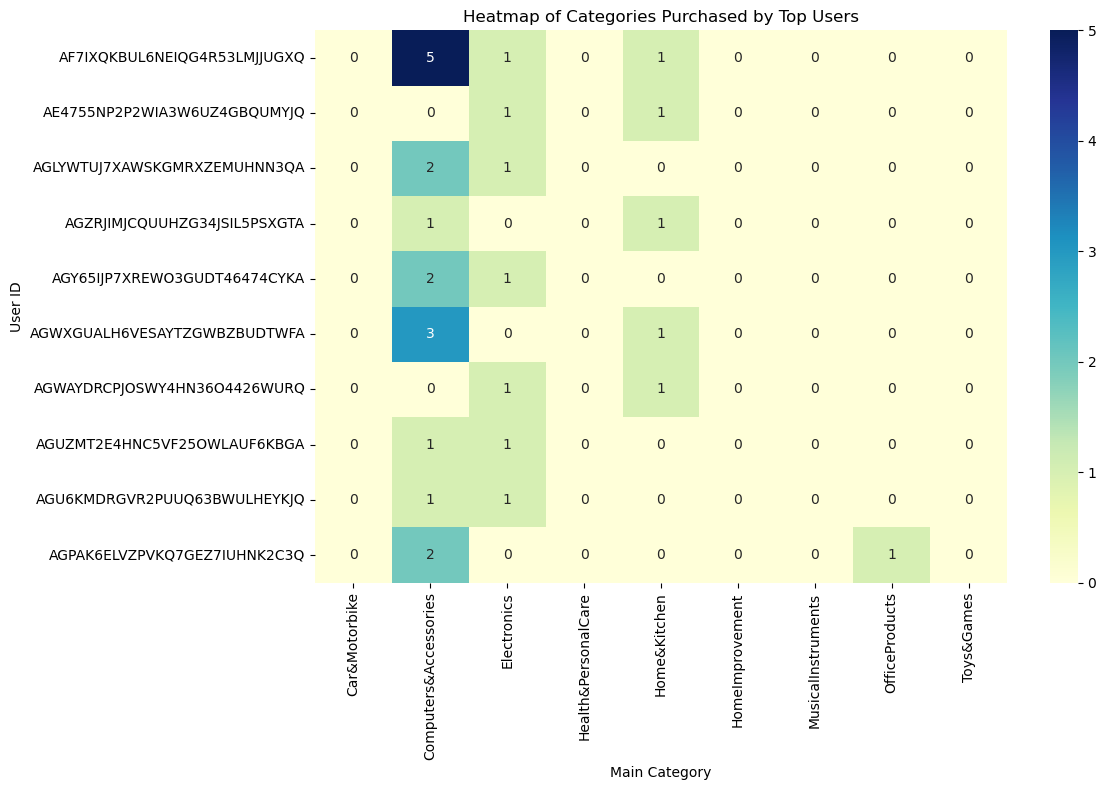

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_matrix, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Categories Purchased by Top Users')
plt.xlabel('Main Category')
plt.ylabel('User ID')
plt.tight_layout()
plt.show()